In [12]:
!pwd

/home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22


# Essential dynamics on BB using all trajectories

In [ ]:
%%bash
bash pca_backbone_both_proteins_and_mutants.sh

# PCA plot with legends (seaborn)

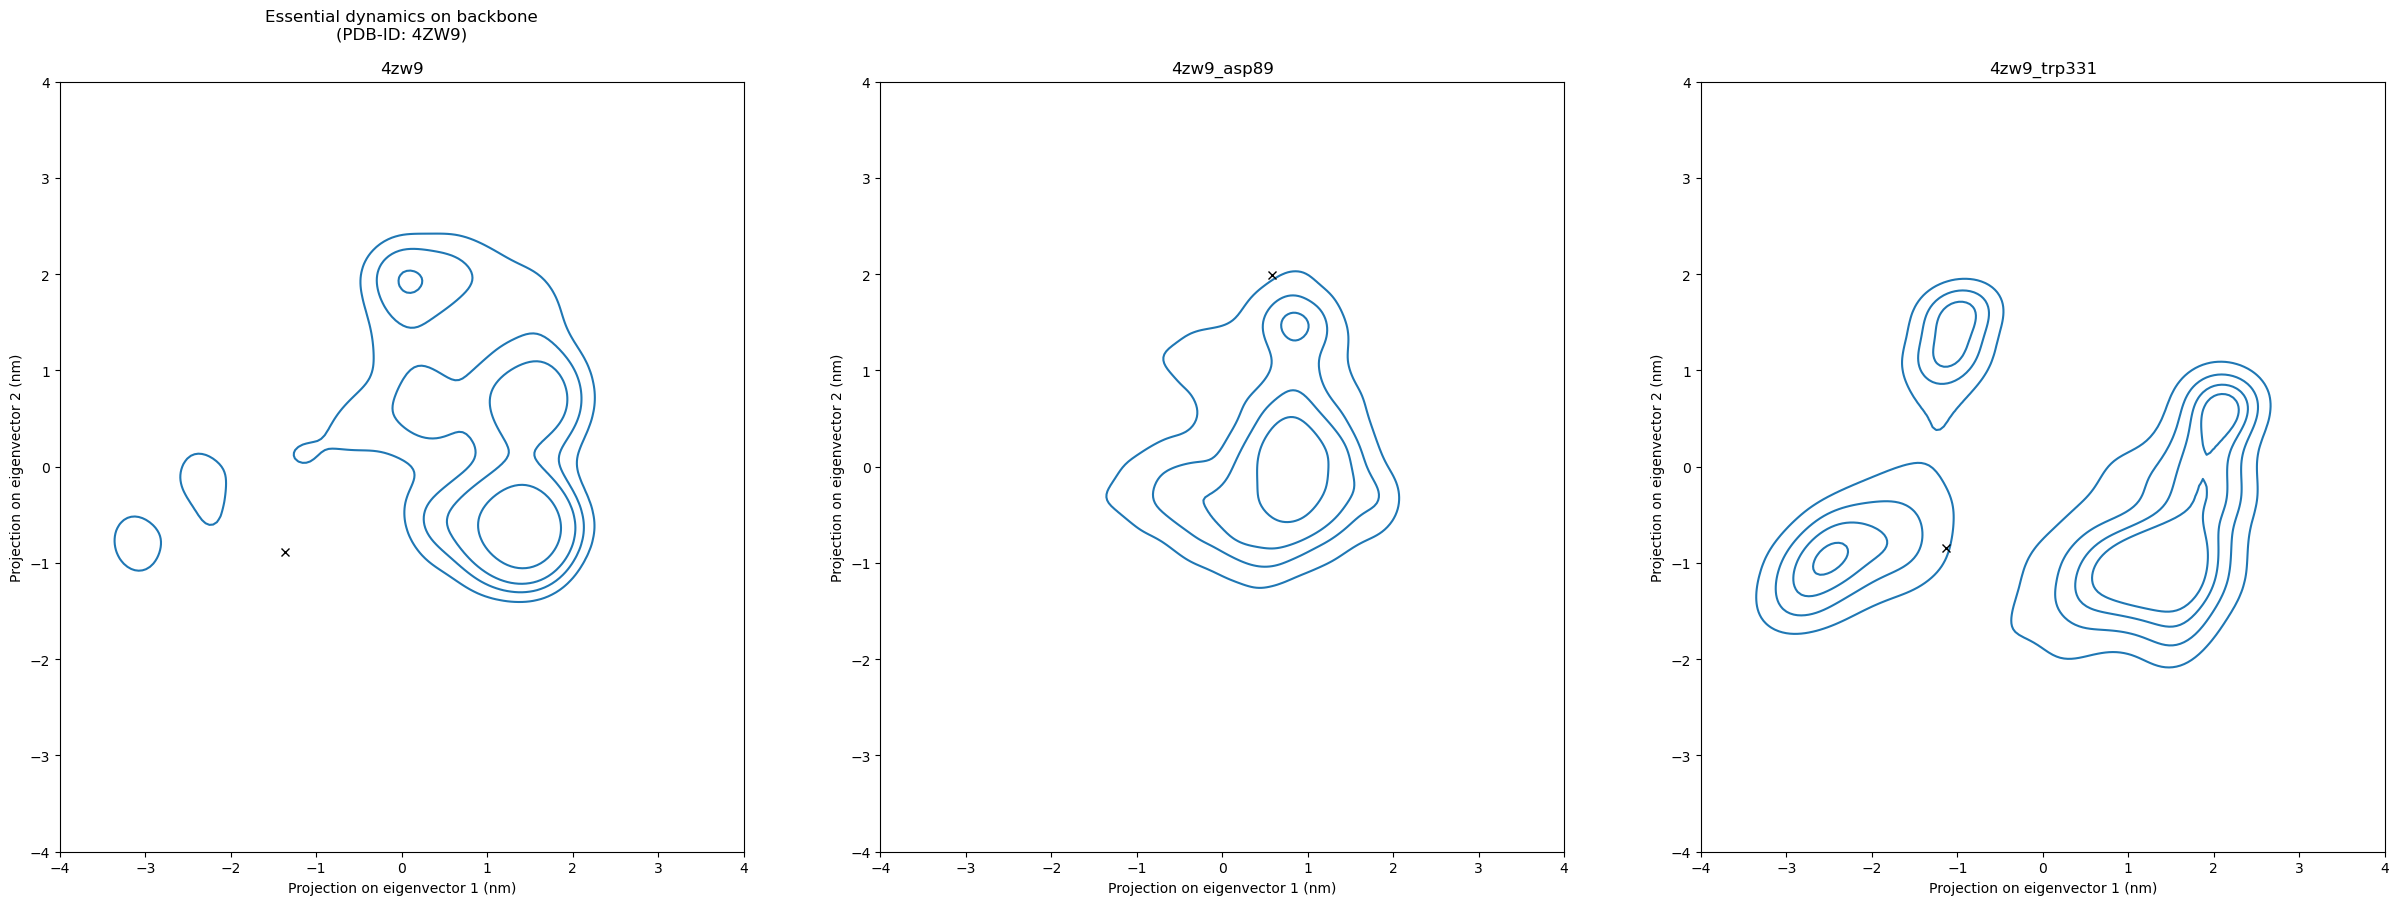

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False
dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))


fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

protein="4zw9"
for i, item in enumerate(["", "_asp89", "_trp331"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) }
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item

    # sns.jointplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), kind="kde")
    sns.kdeplot(data=df, x="x", y="y", levels=5, thresh=.2, ax=axs[i], legend=(i==0))

    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-4, 4))
    axs[i].set_ylim((-4, 4))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    
    # Title:
    if i == 0:      
        axs[i].set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    else:
        axs[i].set_title(f"{label}")

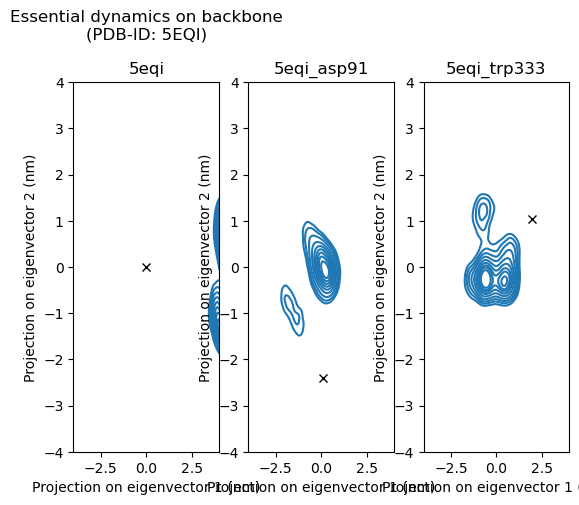

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False
dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))


fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

protein="5eqi"
for i, item in enumerate(["", "_asp91", "_trp333"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) }
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item

    # sns.jointplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), kind="kde")
    sns.kdeplot(data=df, x="x", y="y", thresh=.2, ax=axs[i], legend=(i==0))
    # sns.scatterplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), s=1)
    

    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-4, 4))
    axs[i].set_ylim((-4, 4))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    
    # Title:
    if i == 0:      
        axs[i].set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    else:
        axs[i].set_title(f"{label}")

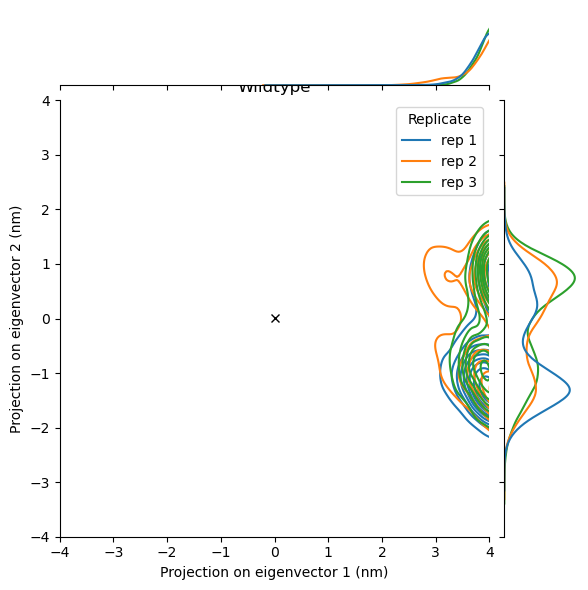

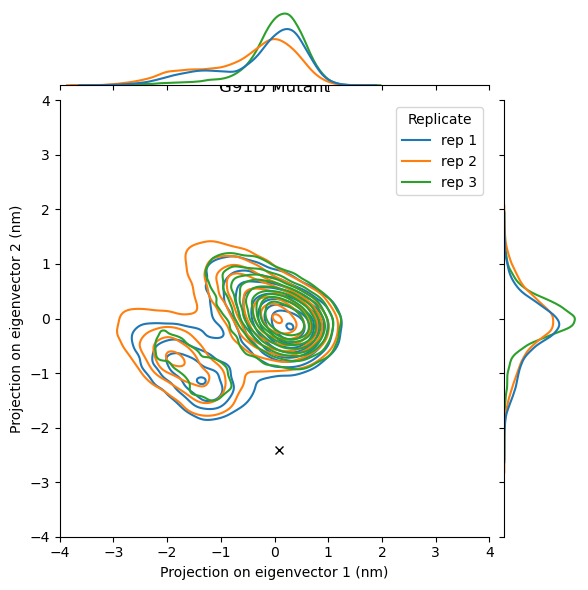

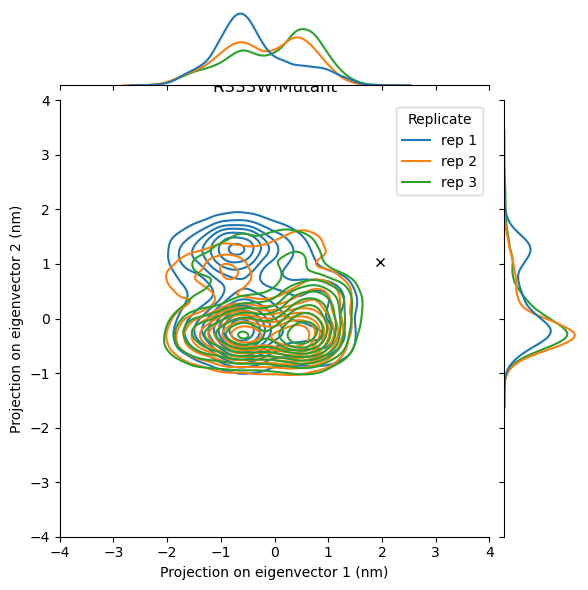

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

label_dict = dict(zip(["", "_asp91", "_trp333"], ["Wildtype", "G91D Mutant", "R333W Mutant"]))

protein="5eqi"
for i, item in enumerate(["", "_asp91", "_trp333"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) }
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = label_dict[item]

    jp = sns.jointplot(data=df, x="x", y="y", hue="Replicate", legend=True, kind="kde")
    jp.ax_joint.set_xlabel("Projection on eigenvector 1 (nm)")
    jp.ax_joint.set_ylabel("Projection on eigenvector 2 (nm)")
    jp.ax_joint.set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    jp.ax_joint.plot(x1, y1, "x", c="black")
    jp.ax_joint.set_xlim((-4,4))
    jp.ax_joint.set_ylim((-4,4))


# TM helices

In [ ]:
%%bash

bash pca_tm_helcies_both_proteins_and_mutants.sh

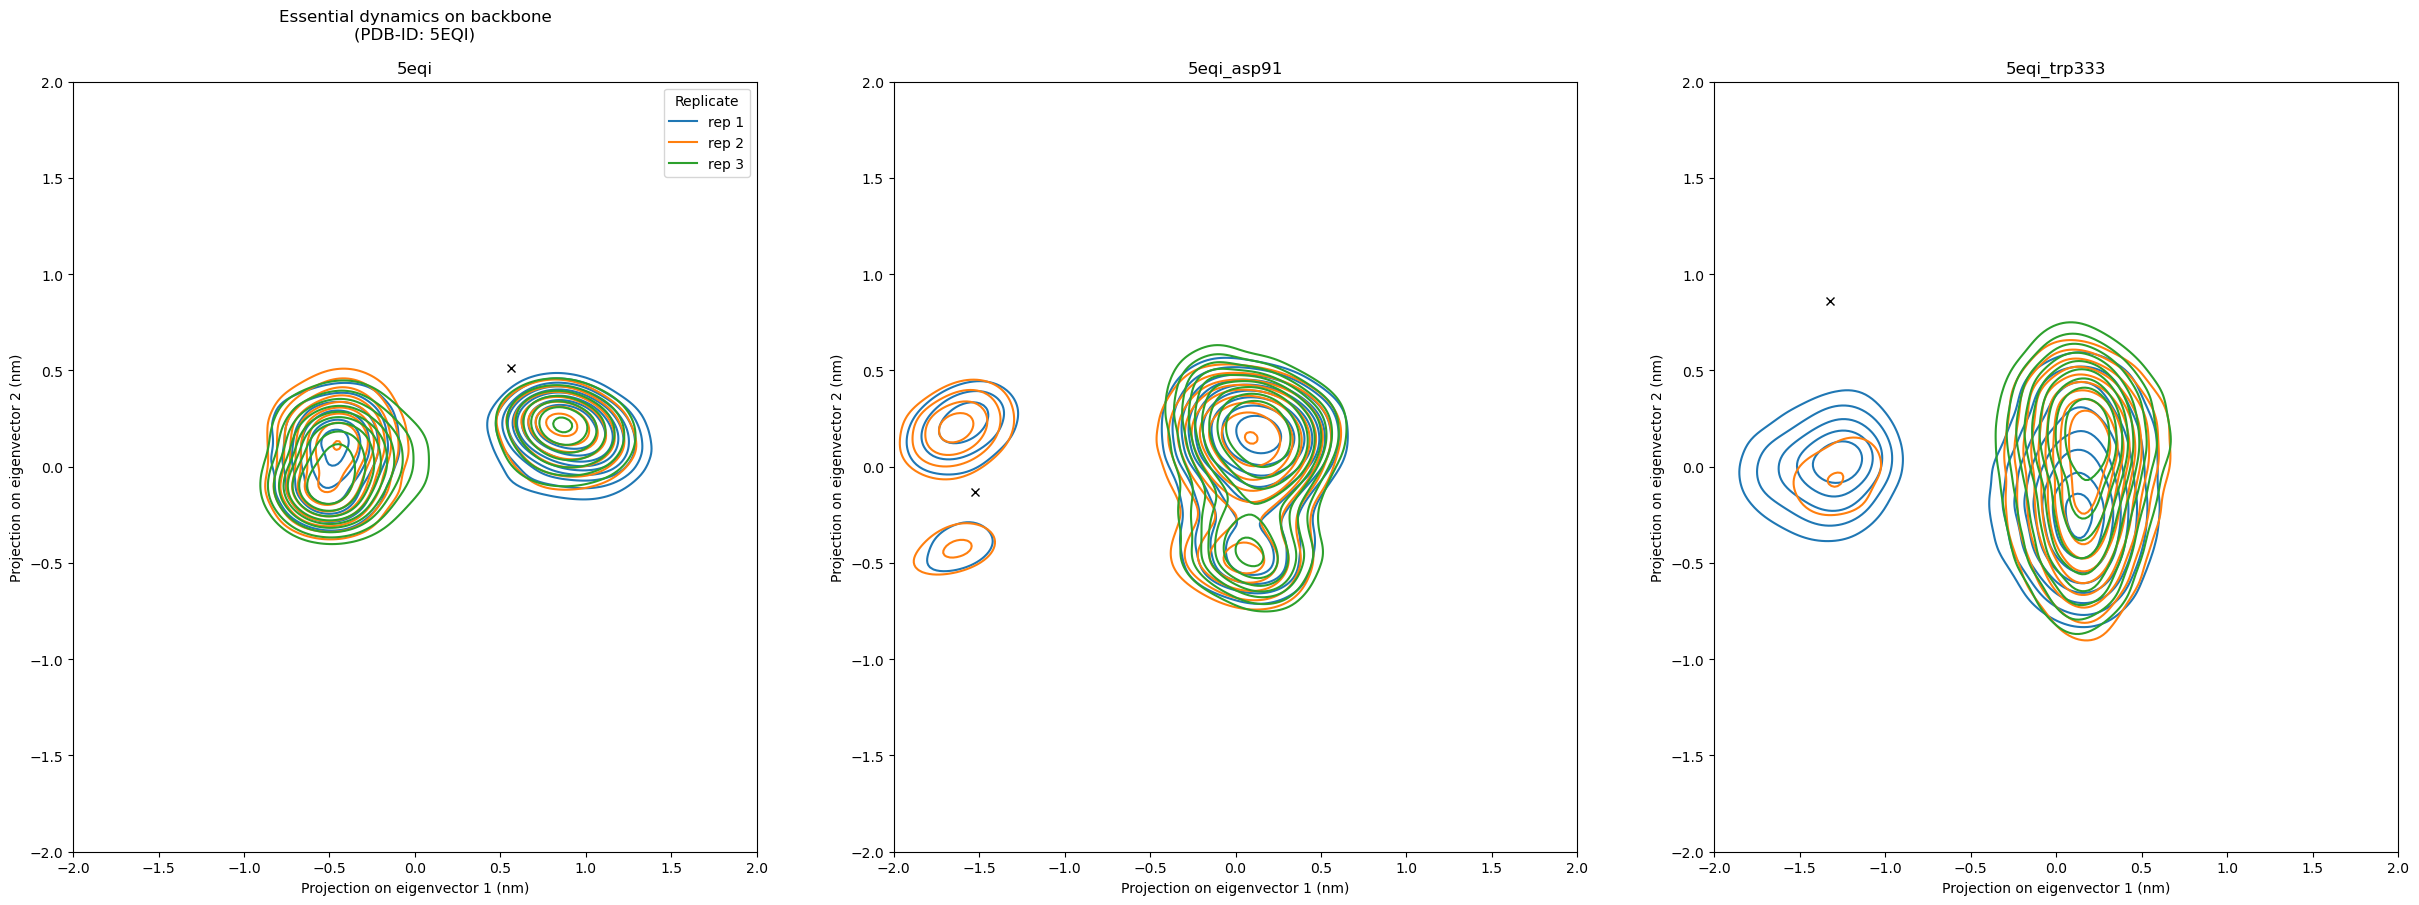

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False
dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))


fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

protein="5eqi"
for i, item in enumerate(["", "_asp91", "_trp333"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.tm.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) }
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item

    # sns.jointplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), kind="kde")
    sns.kdeplot(data=df, x="x", y="y", thresh=.2, ax=axs[i], legend=(i==0), hue="Replicate")
    # sns.scatterplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), s=1)
    

    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-2, 2))
    axs[i].set_ylim((-2, 2))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    
    # Title:
    if i == 0:      
        axs[i].set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    else:
        axs[i].set_title(f"{label}")

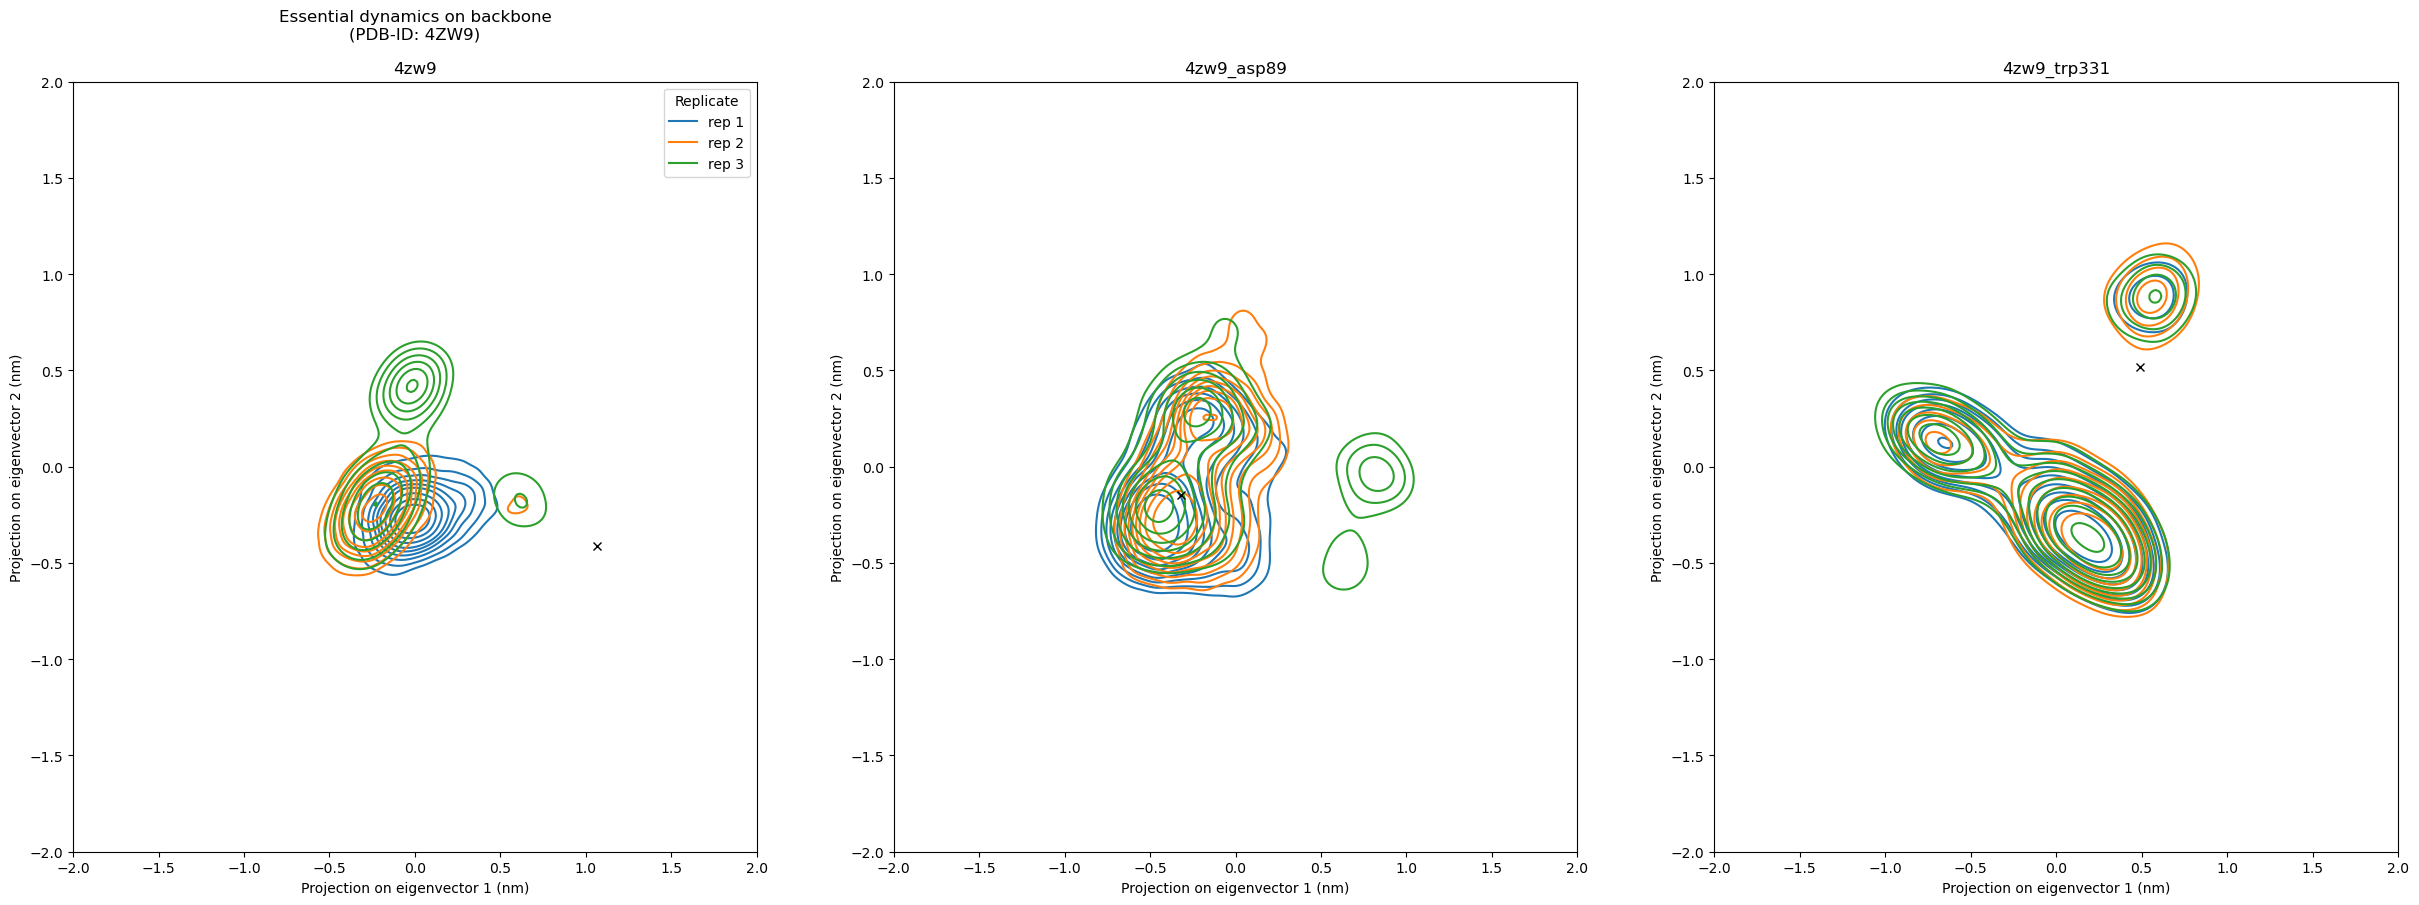

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False
dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))


fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

protein="4zw9"
for i, item in enumerate(["", "_asp89", "_trp331"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.tm.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) }
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item

    # sns.jointplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), kind="kde")
    sns.kdeplot(data=df, x="x", y="y", thresh=.2, ax=axs[i], legend=(i==0), hue="Replicate")
    # sns.scatterplot(data=df, x="x", y="y", ax=axs[i], hue="Replicate", legend=(i==0), s=1)
    

    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-2, 2))
    axs[i].set_ylim((-2, 2))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    
    # Title:
    if i == 0:      
        axs[i].set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    else:
        axs[i].set_title(f"{label}")

# 4zw9 and 5eqi in same space

### 1.4 Overall dynamics using Essential Dynamics analysis
Essential dynamics analysis was performed using GROMACS on the GLUT1 and GLUT3 
simulations. To allow this comparison between these two homologous proteins, and allow to focus 
on overall motions of the channel region, we selected the structurally conserved helical segments, 
as summarized in Table S2. **Then, the covariance and eigenvalue calculation was performed on 
the ensemble of both wildtype systems**, using the AT, CG and ConsDYN simulations. (Copied from supplemental data)

#### 5EQI

In [27]:
%%bash
source /usr/local/gromacs/bin/GMXRC

mkdir -p pca/out


#### Wildtype
printf "16" | gmx trjcat -f \
./5eqi/rep1/step7_production_rep1.xtc \
./5eqi/rep2/step7_production_rep2.xtc \
./5eqi/rep3/step7_production_rep3.xtc \
-n ./5eqi/index.bb.ndx \
-o pca/5eqi_everything_all_rep_test.xtc


printf "16" | gmx convert-tpr \
    -s ./5eqi/rep1/step7_production_rep1.tpr \
    -n ./5eqi/index.bb.ndx \
    -o 5eqi_modified.bb_test.tpr

#### Mutant 1
printf "16" | gmx trjcat -f \
./5eqi_asp91/rep1/step7_production_rep1.xtc \
./5eqi_asp91/rep2/step7_production_rep2.xtc \
./5eqi_asp91/rep3/step7_production_rep3.xtc \
-n ./5eqi_asp91/index.bb.ndx \
-o pca/5eqi_asp91_everything_all_rep_test.xtc

printf "16" | gmx convert-tpr \
    -s ./5eqi_asp91/rep1/step7_production_rep1.tpr \
    -n ./5eqi_asp91/index.bb.ndx \
    -o 5eqi_asp91_modified.bb_test.tpr

#### Mutant 2
printf "16" | gmx trjcat -f \
./5eqi_trp333/rep1/step7_production_rep1.xtc \
./5eqi_trp333/rep2/step7_production_rep2.xtc \
./5eqi_trp333/rep3/step7_production_rep3.xtc \
-n ./5eqi_trp333/index.bb.ndx \
-o pca/5eqi_trp333_everything_all_rep_test.xtc

printf "16" | gmx convert-tpr \
    -s ./5eqi_trp333/rep1/step7_production_rep1.tpr \
    -n ./5eqi_trp333/index.bb.ndx \
    -o 5eqi_trp333_modified.bb_test.tpr

#### 

gmx trjcat -f \
    pca/5eqi_everything_all_rep_test.xtc \
    pca/5eqi_asp91_everything_all_rep_test.xtc \
    pca/5eqi_trp333_everything_all_rep_test.xtc \
    -o wildtype_and_mutant.xtc

# Calculate eigenvectors:
printf "0 0\n" | gmx covar \
    -f wildtype_and_mutant.xtc \
    -s 5eqi_modified.bb_test.tpr \
    -o test.xvg \
    -v test.trr

# Map things back:
for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s ./5eqi/rep1/step7_production_rep1.tpr \
    -eig test.xvg \
    -v test.trr \
    -f ./5eqi/rep${i}/step7_production_rep${i}.xtc \
    -n 5eqi/index.bb.ndx \
    -2d pca/out/5eqi_rep${i}.everything.bb_test.xvg -first 1 -last 2
done

for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s ./5eqi_asp91/rep1/step7_production_rep1.tpr \
    -eig test.xvg \
    -v test.trr \
    -f ./5eqi_asp91/rep${i}/step7_production_rep${i}.xtc \
    -n ./5eqi_asp91/index.bb.ndx \
    -2d pca/out/5eqi_asp91_rep${i}.everything.bb_test.xvg -first 1 -last 2
done


# Mutant 2
for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s 5eqi_trp333/rep${i}/step7_production_rep${i}.tpr  \
    -eig test.xvg \
    -v test.trr \
    -f ./5eqi_trp333/rep${i}/step7_production_rep${i}.xtc \
    -n ./5eqi_trp333/index.bb.ndx \
    -2d pca/out/5eqi_trp333_rep${i}.everything.bb_test.xvg -first 1 -last 2
done

                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./5eqi/rep1/step7_production_rep1.xtc ./5eqi/rep2/step7_production_rep2.xtc ./5eqi/rep3/step7_production_rep3.xtc -n ./5eqi/index.bb.ndx -o pca/5eqi_everything_all_rep_test.xtc

Group     0 (         System) has 13886 elements
Group     1 (        Protein) has   975 elements
Group     2 (      Protein-H) has   975 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   975 elements
Group     9 (    SideChain-H) has   975 elements
Group    10 (    Prot-Masses) has   975 elements
Group    11 (    non-Prote

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi/rep1/step7_production_rep1.tpr -n ./5eqi/index.bb.ndx -o 5eqi_modified.bb_test.tpr

Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13886 elements
Group     1 (        Protein) has   975 elements
Group     2 (      Protein-H) has   975 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   975 elements
Group     9 (    SideChain-H) has   975 elements
Group    10 (    Prot-Masses) has   975 elements
Grou

Selected 16: 'BB'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./5eqi_asp91/rep1/step7_production_rep1.xtc ./5eqi_asp91/rep2/step7_production_rep2.xtc ./5eqi_asp91/rep3/step7_production_rep3.xtc -n ./5eqi_asp91/index.bb.ndx -o pca/5eqi_asp91_everything_all_rep_test.xtc

Group     0 (         System) has 14137 elements
Group     1 (        Protein) has   976 elements
Group     2 (      Protein-H) has   976 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   976 elements
Group     9 (    SideChain-H) has   976 elements
Group    10 (    Prot-Masses) has   976 eleme

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -n ./5eqi_asp91/index.bb.ndx -o 5eqi_asp91_modified.bb_test.tpr

Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14137 elements
Group     1 (        Protein) has   976 elements
Group     2 (      Protein-H) has   976 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   976 elements
Group     9 (    SideChain-H) has   976 elements
Group    10 (    Prot-Masses)

Selected 16: 'BB'


Group     0 (         System) has 14052 elements
Group     1 (        Protein) has   977 elements
Group     2 (      Protein-H) has   977 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   977 elements
Group     9 (    SideChain-H) has   977 elements
Group    10 (    Prot-Masses) has   977 elements
Group    11 (    non-Protein) has 13075 elements
Group    12 (          Other) has 13075 elements
Group    13 (           POPC) has  4560 elements
Group    14 (              W) has  8317 elements
Group    15 (            ION) has   198 elements
Group    16 (             BB) has   447 elements
Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
------------------------------

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi_trp333/rep1/step7_production_rep1.tpr -n ./5eqi_trp333/index.bb.ndx -o 5eqi_trp333_modified.bb_test.tpr

Reading file ./5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14052 elements
Group     1 (        Protein) has   977 elements
Group     2 (      Protein-H) has   977 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   977 elements
Group     9 (    SideChain-H) has   977 elements
Group    10 (    Prot-Mas

Selected 16: 'BB'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f pca/5eqi_everything_all_rep_test.xtc pca/5eqi_asp91_everything_all_rep_test.xtc pca/5eqi_trp333_everything_all_rep_test.xtc -o wildtype_and_mutant.xtc

Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
---------------------------------------------------------
pca/5eqi_everything_all_rep_test.xtc        0.000 ps      200.000 ps
pca/5eqi_asp91_everything_all_rep_test.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/5eqi_trp333_everything_all_rep_test.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous


Back Off! I just backed up wildtype_and_mutant.xtc to ./#wildtype_and_mutant.xtc.1#
Last frame     2

Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0

lasttime 0

lasttime 0


                      :-) GROMACS - gmx covar, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx covar -f wildtype_and_mutant.xtc -s 5eqi_modified.bb_test.tpr -o test.xvg -v test.trr

Reading file 5eqi_modified.bb_test.tpr, VERSION 2023.3 (single precision)
Reading file 5eqi_modified.bb_test.tpr, VERSION 2023.3 (single precision)
Group     0 (         System) has   447 elements
Group     1 (        Protein) has   447 elements
Group     2 (      Protein-H) has   447 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   447 elements
Group     9 (    SideChain-H) has   447 elements
Select a group: Group     0 (


Choose a group for the least squares fit
Selected 0: 'System'

Choose a group for the covariance analysis
Selected 0: 'System'
Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi/rep1/step7_production_rep1.xtc -n 5eqi/index.bb.ndx -2d pca/out/5eqi_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13886 elements
Group     1 (        Protein) 


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi/rep2/step7_production_rep2.xtc -n 5eqi/index.bb.ndx -2d pca/out/5eqi_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13886 elements
Group     1 (        Protein) 


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi/rep3/step7_production_rep3.xtc -n 5eqi/index.bb.ndx -2d pca/out/5eqi_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13886 elements
Group     1 (        Protein) 


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi_asp91/rep1/step7_production_rep1.xtc -n ./5eqi_asp91/index.bb.ndx -2d pca/out/5eqi_asp91_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14137 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi_asp91/rep2/step7_production_rep2.xtc -n ./5eqi_asp91/index.bb.ndx -2d pca/out/5eqi_asp91_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14137 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi_asp91/rep3/step7_production_rep3.xtc -n ./5eqi_asp91/index.bb.ndx -2d pca/out/5eqi_asp91_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14137 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 5eqi_trp333/rep1/step7_production_rep1.tpr -eig test.xvg -v test.trr -f ./5eqi_trp333/rep1/step7_production_rep1.xtc -n ./5eqi_trp333/index.bb.ndx -2d pca/out/5eqi_trp333_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file 5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14052 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 5eqi_trp333/rep2/step7_production_rep2.tpr -eig test.xvg -v test.trr -f ./5eqi_trp333/rep2/step7_production_rep2.xtc -n ./5eqi_trp333/index.bb.ndx -2d pca/out/5eqi_trp333_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file 5eqi_trp333/rep2/step7_production_rep2.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 5eqi_trp333/rep2/step7_production_rep2.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14052 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 5eqi_trp333/rep3/step7_production_rep3.tpr -eig test.xvg -v test.trr -f ./5eqi_trp333/rep3/step7_production_rep3.xtc -n ./5eqi_trp333/index.bb.ndx -2d pca/out/5eqi_trp333_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 447 atoms from test.trr
Read non mass weighted average/minimum structure with 447 atoms from test.trr
Read 1341 eigenvectors (for 447 atoms)

Read 1341 eigenvalues from test.xvg
Reading file 5eqi_trp333/rep3/step7_production_rep3.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 5eqi_trp333/rep3/step7_production_rep3.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 14052 e


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 447 elements that corresponds to the eigenvectors
Selected 16: 'BB'



Text(0.5, 1.0, 'GLUT1 (R333W)')

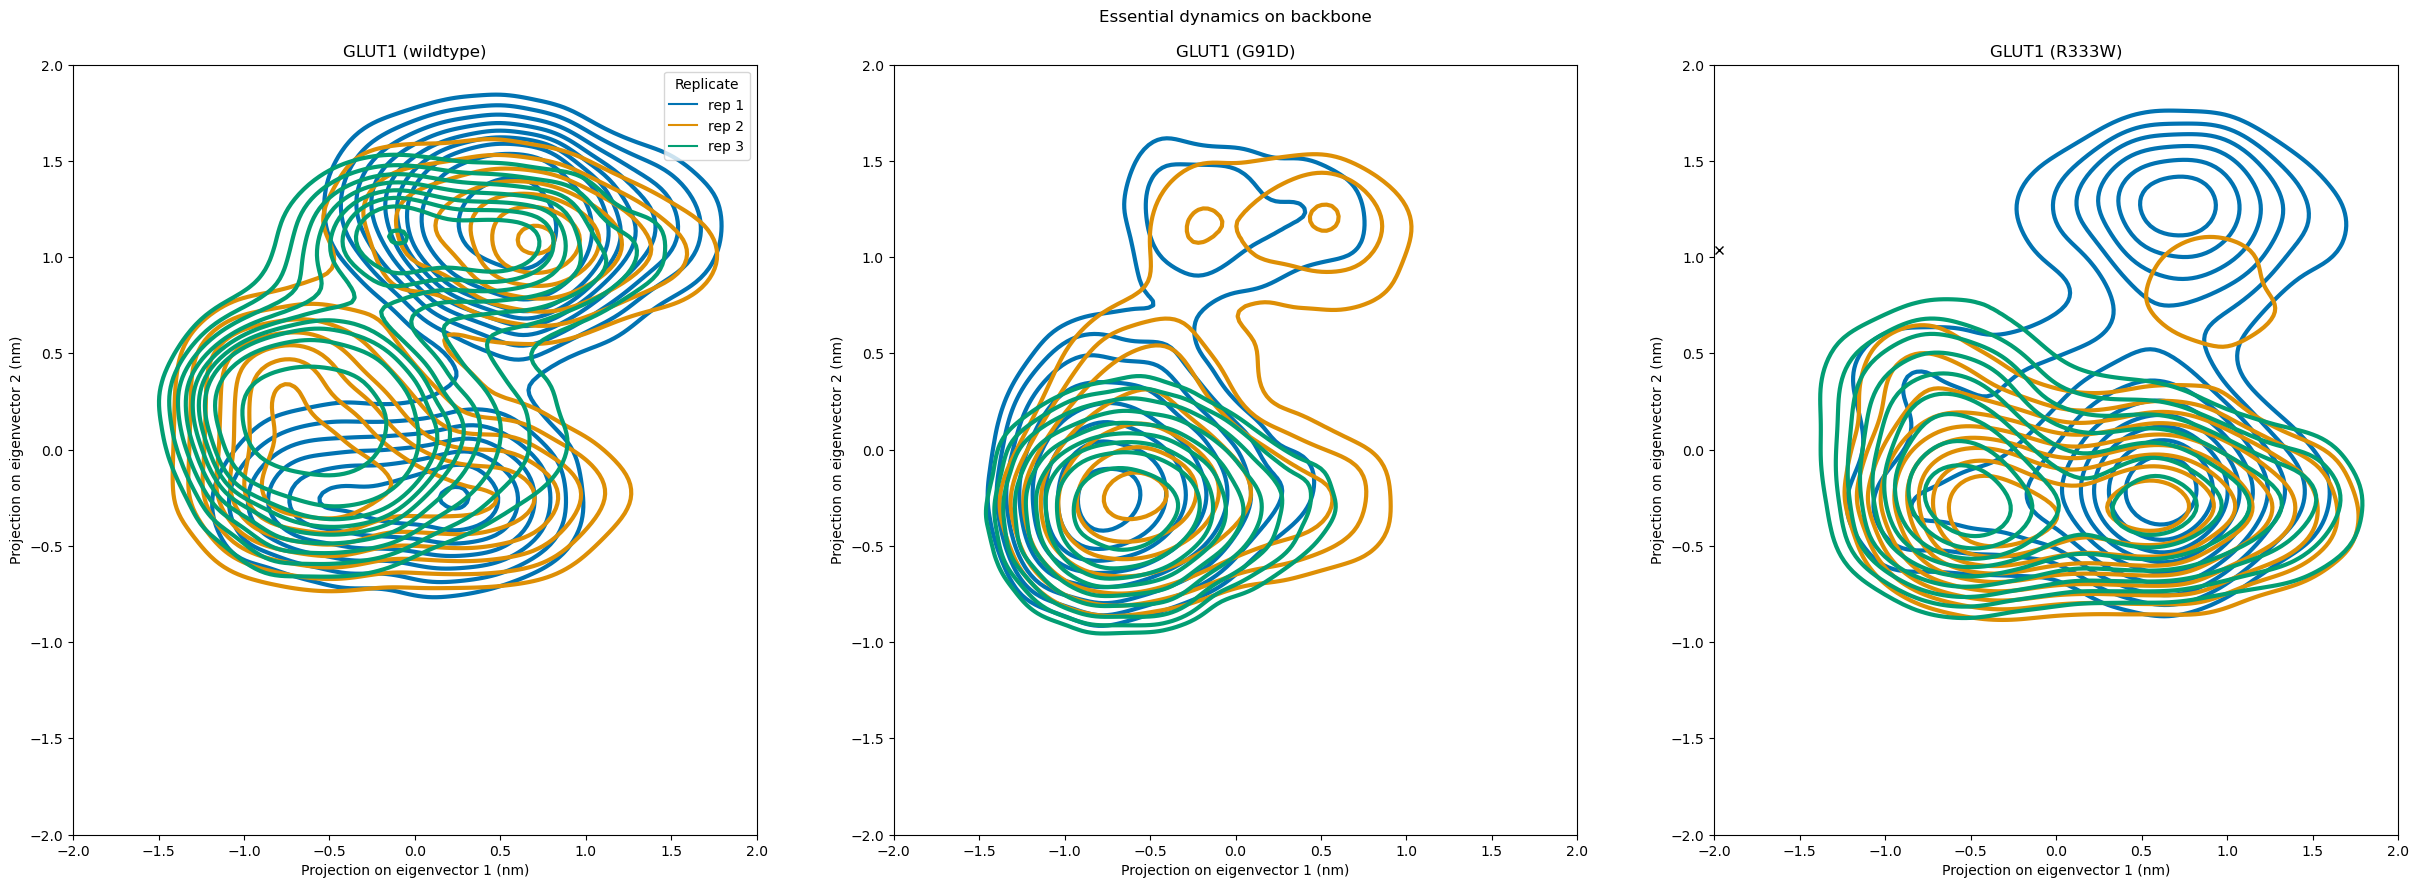

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("colorblind")
# sns.set_palette(palette='Accent')

def subset(some_data, interval=10):
    some_data = list(some_data)
    x_new = []
    for i in range(len(some_data)-interval):
        if i % interval == 0:
            x_new.append(some_data[i])
    return x_new

plot_legend = False

fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

protein="5eqi"
for i, item in enumerate(["", "_asp91", "_trp333"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb_test.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) 
                }
        
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item
    sns.kdeplot(data=df, x="x", y="y", thresh=.2, ax=axs[i], legend=(i==0), hue="Replicate", linewidths=3)
    # x_test = subset(df['x'], 25)
    # y_test = subset(df['y'], 25)
    # print(len(df['x']))
    # print(len(df['y']))
    # sns.scatterplot(x=x_test, y=y_test, legend=False, ax=axs[i], hue=subset(df["Replicate"], 25))


    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-2, 2))
    axs[i].set_ylim((-2, 2))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    
    # # Title:
    # if i == 1:      
    #     axs[i].set_title(f"Essential dynamics on backbone\n(PDB-ID: {protein.upper()})\n\n{label}")
    # else:
    #     axs[i].set_title(f"{label}")

axs[0].set_title("GLUT1 (wildtype)")
axs[1].set_title("Essential dynamics on backbone\n\nGLUT1 (G91D)")
axs[2].set_title("GLUT1 (R333W)")

#### 4ZW9

In [29]:

%%bash
source /usr/local/gromacs/bin/GMXRC

mkdir -p pca/out


#### Wildtype
printf "BB" | gmx trjcat -f \
./4zw9/rep1/step7_production_rep1.xtc \
./4zw9/rep2/step7_production_rep2.xtc \
./4zw9/rep3/step7_production_rep3.xtc \
-n ./4zw9/index.bb.ndx \
-o pca/4zw9_everything_all_rep_test.xtc


printf "BB" | gmx convert-tpr \
    -s ./4zw9/rep1/step7_production_rep1.tpr \
    -n ./4zw9/index.bb.ndx \
    -o 4zw9_modified.bb_test.tpr

#### Mutant 1
printf "BB" | gmx trjcat -f \
./4zw9_asp89/rep1/step7_production_rep1.xtc \
./4zw9_asp89/rep2/step7_production_rep2.xtc \
./4zw9_asp89/rep3/step7_production_rep3.xtc \
-n ./4zw9_asp89/index.bb.ndx \
-o pca/4zw9_asp89_everything_all_rep_test.xtc

printf "BB" | gmx convert-tpr \
    -s ./4zw9_asp89/rep1/step7_production_rep1.tpr \
    -n ./4zw9_asp89/index.bb.ndx \
    -o 4zw9_asp89_modified.bb_test.tpr

#### Mutant 2
printf "BB" | gmx trjcat -f \
./4zw9_trp331/rep1/step7_production_rep1.xtc \
./4zw9_trp331/rep2/step7_production_rep2.xtc \
./4zw9_trp331/rep3/step7_production_rep3.xtc \
-n ./4zw9_trp331/index.bb.ndx \
-o pca/4zw9_trp331_everything_all_rep_test.xtc

printf "BB" | gmx convert-tpr \
    -s ./4zw9_trp331/rep1/step7_production_rep1.tpr \
    -n ./4zw9_trp331/index.bb.ndx \
    -o 4zw9_trp331_modified.bb_test.tpr

#### 

gmx trjcat -f \
    pca/4zw9_everything_all_rep_test.xtc \
    pca/4zw9_asp89_everything_all_rep_test.xtc \
    pca/4zw9_trp331_everything_all_rep_test.xtc \
    -o wildtype_and_mutant.xtc

# Calculate eigenvectors:
printf "0 0\n" | gmx covar \
    -f wildtype_and_mutant.xtc \
    -s 4zw9_modified.bb_test.tpr \
    -o test.4zw9.xvg \
    -v test.4zw9.trr

# Map things back:
for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s ./4zw9/rep1/step7_production_rep1.tpr \
    -eig test.4zw9.xvg \
    -v test.4zw9.trr \
    -f ./4zw9/rep${i}/step7_production_rep${i}.xtc \
    -n 4zw9/index.bb.ndx \
    -2d pca/out/4zw9_rep${i}.everything.bb_test.xvg -first 1 -last 2
done

for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s ./4zw9_asp89/rep1/step7_production_rep1.tpr \
    -eig test.4zw9.xvg \
    -v test.4zw9.trr \
    -f ./4zw9_asp89/rep${i}/step7_production_rep${i}.xtc \
    -n ./4zw9_asp89/index.bb.ndx \
    -2d pca/out/4zw9_asp89_rep${i}.everything.bb_test.xvg -first 1 -last 2
done


# Mutant 2
for i in 1 2 3
do
echo "Replicate ${i}"
printf "BB BB\n" | gmx anaeig \
    -s 4zw9_trp331/rep${i}/step7_production_rep${i}.tpr  \
    -eig test.4zw9.xvg \
    -v test.4zw9.trr \
    -f ./4zw9_trp331/rep${i}/step7_production_rep${i}.xtc \
    -n ./4zw9_trp331/index.bb.ndx \
    -2d pca/out/4zw9_trp331_rep${i}.everything.bb_test.xvg -first 1 -last 2
done

                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./4zw9/rep1/step7_production_rep1.xtc ./4zw9/rep2/step7_production_rep2.xtc ./4zw9/rep3/step7_production_rep3.xtc -n ./4zw9/index.bb.ndx -o pca/4zw9_everything_all_rep_test.xtc

Group     0 (         System) has 13512 elements
Group     1 (        Protein) has  1010 elements
Group     2 (      Protein-H) has  1010 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1010 elements
Group     9 (    SideChain-H) has  1010 elements
Group    10 (    Prot-Masses) has  1010 elements
Group    11 (    non-Prote

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9/rep1/step7_production_rep1.tpr -n ./4zw9/index.bb.ndx -o 4zw9_modified.bb_test.tpr

Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13512 elements
Group     1 (        Protein) has  1010 elements
Group     2 (      Protein-H) has  1010 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1010 elements
Group     9 (    SideChain-H) has  1010 elements
Group    10 (    Prot-Masses) has  1010 elements
Grou

Selected 16: 'BB'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./4zw9_asp89/rep1/step7_production_rep1.xtc ./4zw9_asp89/rep2/step7_production_rep2.xtc ./4zw9_asp89/rep3/step7_production_rep3.xtc -n ./4zw9_asp89/index.bb.ndx -o pca/4zw9_asp89_everything_all_rep_test.xtc

Group     0 (         System) has 13516 elements
Group     1 (        Protein) has  1011 elements
Group     2 (      Protein-H) has  1011 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1011 elements
Group     9 (    SideChain-H) has  1011 elements
Group    10 (    Prot-Masses) has  1011 eleme

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -n ./4zw9_asp89/index.bb.ndx -o 4zw9_asp89_modified.bb_test.tpr

Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13516 elements
Group     1 (        Protein) has  1011 elements
Group     2 (      Protein-H) has  1011 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1011 elements
Group     9 (    SideChain-H) has  1011 elements
Group    10 (    Prot-Masses)

Selected 16: 'BB'


Group     0 (         System) has 13531 elements
Group     1 (        Protein) has  1012 elements
Group     2 (      Protein-H) has  1012 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1012 elements
Group     9 (    SideChain-H) has  1012 elements
Group    10 (    Prot-Masses) has  1012 elements
Group    11 (    non-Protein) has 12519 elements
Group    12 (          Other) has 12519 elements
Group    13 (           POPC) has  4536 elements
Group    14 (              W) has  7804 elements
Group    15 (            ION) has   179 elements
Group    16 (             BB) has   470 elements
Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
------------------------------

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 16: 'BB'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9_trp331/rep1/step7_production_rep1.tpr -n ./4zw9_trp331/index.bb.ndx -o 4zw9_trp331_modified.bb_test.tpr

Reading file ./4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13531 elements
Group     1 (        Protein) has  1012 elements
Group     2 (      Protein-H) has  1012 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has  1012 elements
Group     9 (    SideChain-H) has  1012 elements
Group    10 (    Prot-Mas

Selected 16: 'BB'


Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
---------------------------------------------------------
pca/4zw9_everything_all_rep_test.xtc        0.000 ps      200.000 ps
pca/4zw9_asp89_everything_all_rep_test.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/4zw9_trp331_everything_all_rep_test.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous


Back Off! I just backed up wildtype_and_mutant.xtc to ./#wildtype_and_mutant.xtc.2#
Reading frame  222000 time 44400000.000   
Reading frame  224000 time 44800000.000   
Reading frame       0 time    0.000   
Continue writing frames from pca/4zw9_trp331_everything_all_rep_test.xtc t=0 ps, frame=0      
Reading frame  220000 time 44000000.000    ->  frame 220000 time 44000000.000 ps     

Last frame written was 220812, time 44162400.000000 ps

GROMACS reminds you: "I'm Looking for a New Simulation" (Stone

Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0

lasttime 0

lasttime 0


                      :-) GROMACS - gmx covar, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx covar -f wildtype_and_mutant.xtc -s 4zw9_modified.bb_test.tpr -o test.4zw9.xvg -v test.4zw9.trr

Reading file 4zw9_modified.bb_test.tpr, VERSION 2023.3 (single precision)
Reading file 4zw9_modified.bb_test.tpr, VERSION 2023.3 (single precision)
Group     0 (         System) has   470 elements
Group     1 (        Protein) has   470 elements
Group     2 (      Protein-H) has   470 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   470 elements
Group     9 (    SideChain-H) has   470 elements
Select a group: Gro


Choose a group for the least squares fit
Selected 0: 'System'

Choose a group for the covariance analysis
Selected 0: 'System'
Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9/rep1/step7_production_rep1.xtc -n 4zw9/index.bb.ndx -2d pca/out/4zw9_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13512 elements
Group


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9/rep2/step7_production_rep2.xtc -n 4zw9/index.bb.ndx -2d pca/out/4zw9_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13512 elements
Group


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9/rep3/step7_production_rep3.xtc -n 4zw9/index.bb.ndx -2d pca/out/4zw9_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         System) has 13512 elements
Group


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_asp89/rep1/step7_production_rep1.xtc -n ./4zw9_asp89/index.bb.ndx -2d pca/out/4zw9_asp89_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_asp89/rep2/step7_production_rep2.xtc -n ./4zw9_asp89/index.bb.ndx -2d pca/out/4zw9_asp89_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_asp89/rep3/step7_production_rep3.xtc -n ./4zw9_asp89/index.bb.ndx -2d pca/out/4zw9_asp89_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 4zw9_trp331/rep1/step7_production_rep1.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_trp331/rep1/step7_production_rep1.xtc -n ./4zw9_trp331/index.bb.ndx -2d pca/out/4zw9_trp331_rep1.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file 4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 4zw9_trp331/rep2/step7_production_rep2.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_trp331/rep2/step7_production_rep2.xtc -n ./4zw9_trp331/index.bb.ndx -2d pca/out/4zw9_trp331_rep2.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file 4zw9_trp331/rep2/step7_production_rep2.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 4zw9_trp331/rep2/step7_production_rep2.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s 4zw9_trp331/rep3/step7_production_rep3.tpr -eig test.4zw9.xvg -v test.4zw9.trr -f ./4zw9_trp331/rep3/step7_production_rep3.xtc -n ./4zw9_trp331/index.bb.ndx -2d pca/out/4zw9_trp331_rep3.everything.bb_test.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 470 atoms from test.4zw9.trr
Read non mass weighted average/minimum structure with 470 atoms from test.4zw9.trr
Read 1410 eigenvectors (for 470 atoms)

Read 1410 eigenvalues from test.4zw9.xvg
Reading file 4zw9_trp331/rep3/step7_production_rep3.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file 4zw9_trp331/rep3/step7_production_rep3.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (   


Select the index group that was used for the least squares fit in g_covar
Selected 16: 'BB'

Select an index group of 470 elements that corresponds to the eigenvectors
Selected 16: 'BB'



Text(0.5, 1.0, 'GLUT3 (R331W)')

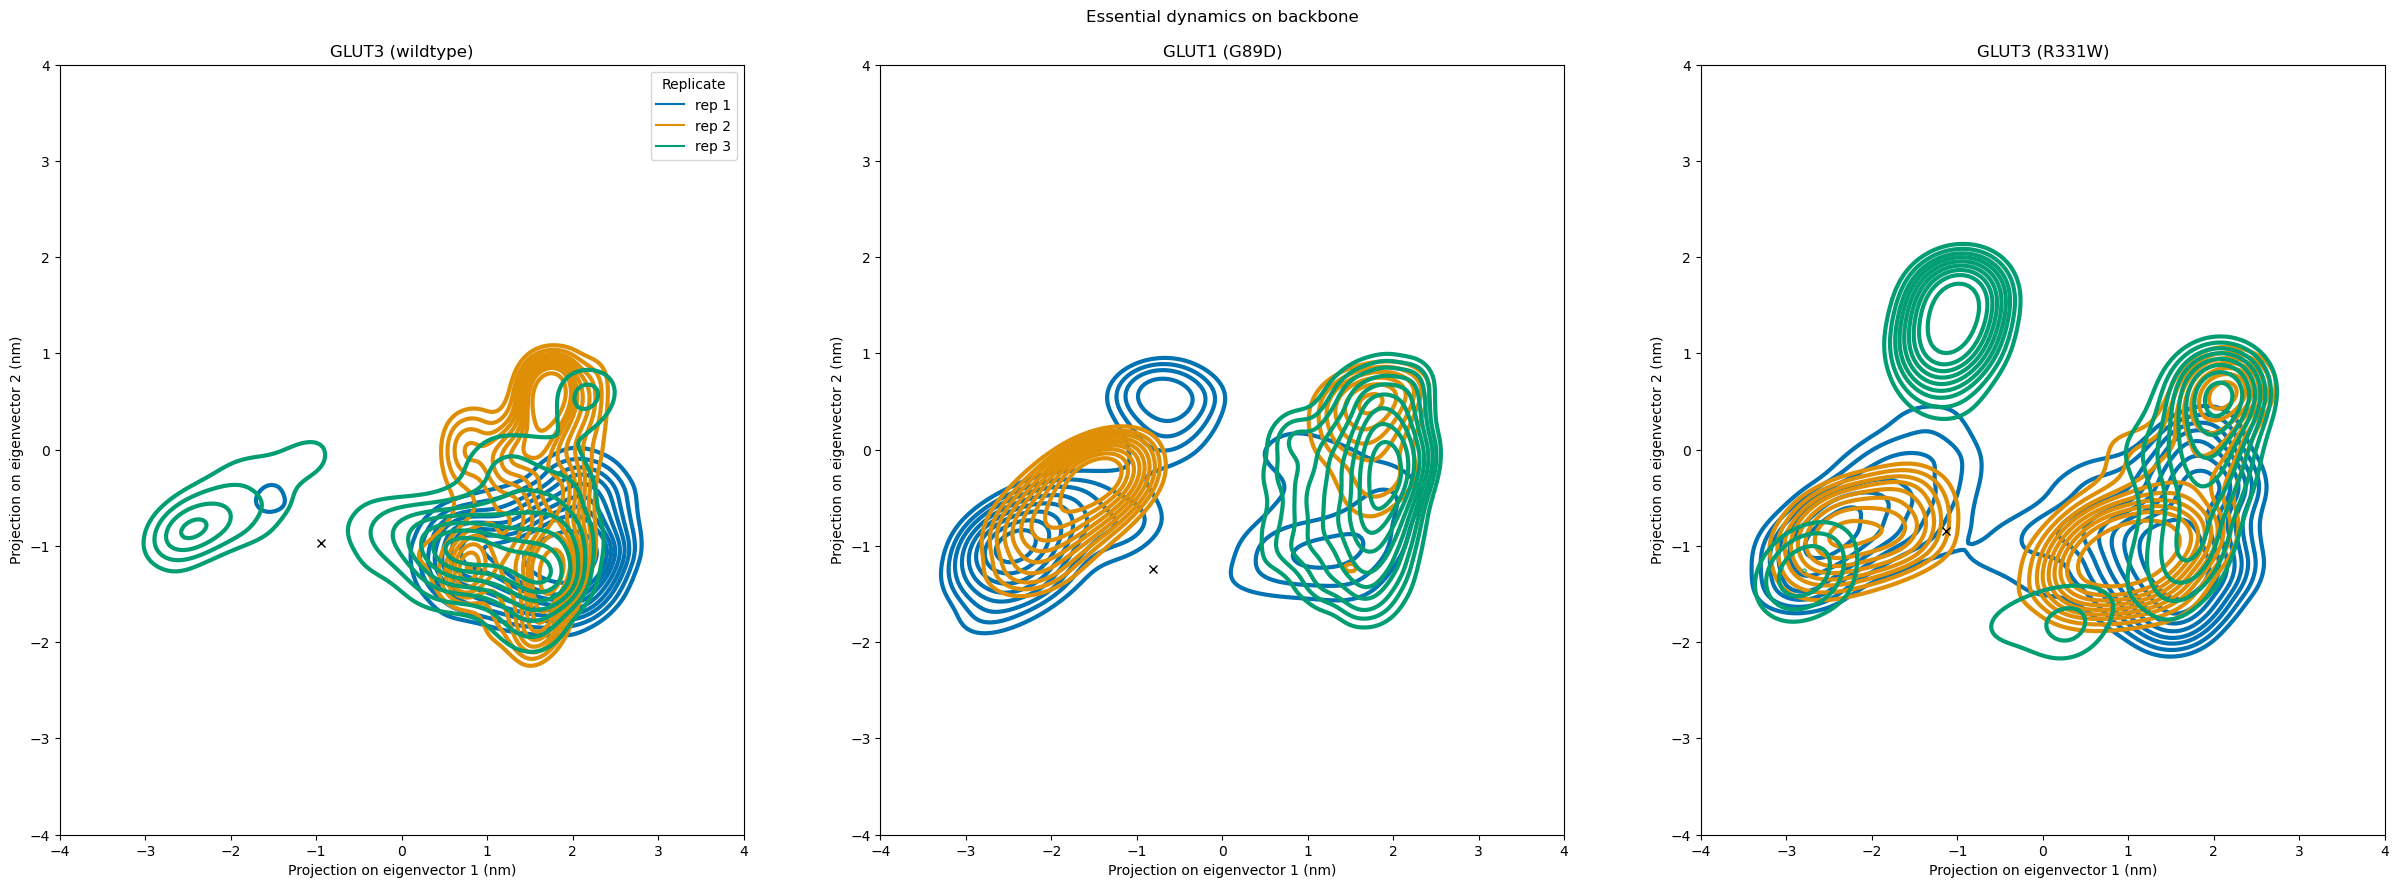

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False

fig, axs = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

protein="4zw9"
for i, item in enumerate(["", "_asp89", "_trp331"]):
    # Collect data from all replicates:
    df = pd.DataFrame()
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb_test.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) 
                }
        
        df = pd.concat([df, pd.DataFrame(data)])

    # Plot everything per condition (WT, Mutants):
    label = protein+item
    sns.kdeplot(data=df, x="x", y="y", thresh=.2, ax=axs[i], legend=(i==0), hue="Replicate", linewidths=3)

    # Set some plot parameters:
    # Grab start point:
    x1 = df[df["Replicate"] == "rep 1"]['x'][0]
    y1 = df[df["Replicate"] == "rep 1"]['y'][0]
    axs[i].plot(x1, y1, "x", c="black")

    # X/Y limits:
    axs[i].set_xlim((-4, 4))
    axs[i].set_ylim((-4, 4))
    axs[i].set_xlabel("Projection on eigenvector 1 (nm)")
    axs[i].set_ylabel("Projection on eigenvector 2 (nm)")
    

axs[0].set_title("GLUT3 (wildtype)")
axs[1].set_title("Essential dynamics on backbone\n\nGLUT1 (G89D)")
axs[2].set_title("GLUT3 (R331W)")

# Both proteins same space


In [31]:

%%bash
source /usr/local/gromacs/bin/GMXRC

mkdir -p pca/out


#### Wildtype 4zw9
printf "full_tm_helices" | gmx trjcat -f \
./4zw9/rep1/step7_production_rep1.xtc \
./4zw9/rep2/step7_production_rep2.xtc \
./4zw9/rep3/step7_production_rep3.xtc \
-n ./config/4zw9_distance.ndx \
-o pca/4zw9_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./4zw9/rep1/step7_production_rep1.tpr \
    -n ./config/4zw9_distance.ndx \
    -o 4zw9_modified.bb_test_all.tpr

#### Wildtype 5eqi
printf "full_tm_helices" | gmx trjcat -f \
./5eqi/rep1/step7_production_rep1.xtc \
./5eqi/rep2/step7_production_rep2.xtc \
./5eqi/rep3/step7_production_rep3.xtc \
-n ./config/5eqi_distance.ndx \
-o pca/5eqi_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./5eqi/rep1/step7_production_rep1.tpr \
    -n ./config/5eqi_distance.ndx \
    -o 5eqi_modified.bb_test_all.tpr

#### Mutant1 4zw9
printf "full_tm_helices" | gmx trjcat -f \
./4zw9_asp89/rep1/step7_production_rep1.xtc \
./4zw9_asp89/rep2/step7_production_rep2.xtc \
./4zw9_asp89/rep3/step7_production_rep3.xtc \
-n config/4zw9_asp89_distance.ndx \
-o pca/4zw9_asp89_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./4zw9_asp89/rep1/step7_production_rep1.tpr \
    -n ./config/4zw9_asp89_distance.ndx \
    -o 4zw9_asp89_modified.bb_test_all.tpr

#### Mutant1 5eqi
printf "full_tm_helices" | gmx trjcat -f \
./5eqi_asp91/rep1/step7_production_rep1.xtc \
./5eqi_asp91/rep2/step7_production_rep2.xtc \
./5eqi_asp91/rep3/step7_production_rep3.xtc \
-n config/5eqi_asp91_distance.ndx \
-o pca/5eqi_asp91_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./5eqi_asp91/rep1/step7_production_rep1.tpr \
    -n ./config/5eqi_asp91_distance.ndx \
    -o 5eqi_asp91_modified.bb_test_all.tpr

#### Mutant2 4zw9
printf "full_tm_helices" | gmx trjcat -f \
./4zw9_trp331/rep1/step7_production_rep1.xtc \
./4zw9_trp331/rep2/step7_production_rep2.xtc \
./4zw9_trp331/rep3/step7_production_rep3.xtc \
-n config/4zw9_trp331_distance.ndx \
-o pca/4zw9_trp331_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./4zw9_trp331/rep1/step7_production_rep1.tpr \
    -n ./config/4zw9_trp331_distance.ndx \
    -o 4zw9_trp331_modified.bb_test_all.tpr

#### Mutant2 5eqi
printf "full_tm_helices" | gmx trjcat -f \
./5eqi_trp333/rep1/step7_production_rep1.xtc \
./5eqi_trp333/rep2/step7_production_rep2.xtc \
./5eqi_trp333/rep3/step7_production_rep3.xtc \
-n config/5eqi_trp333_distance.ndx \
-o pca/5eqi_trp333_everything_all_rep_test_all.xtc

printf "full_tm_helices" | gmx convert-tpr \
    -s ./5eqi_trp333/rep1/step7_production_rep1.tpr \
    -n ./config/5eqi_trp333_distance.ndx \
    -o 5eqi_trp333_modified.bb_test_all.tpr


###################################################
gmx trjcat -f \
    pca/5eqi_everything_all_rep_test_all.xtc \
    pca/4zw9_everything_all_rep_test_all.xtc\
    pca/4zw9_asp89_everything_all_rep_test_all.xtc \
    pca/5eqi_asp91_everything_all_rep_test_all.xtc \
    pca/4zw9_trp331_everything_all_rep_test_all.xtc \
    pca/5eqi_trp333_everything_all_rep_test_all.xtc \
    -o all_sims_both_proteins.xtc

# Calculate eigenvectors:
printf "0 0\n" | gmx covar \
    -f all_sims_both_proteins.xtc \
    -s 4zw9_modified.bb_test_all.tpr \
    -o test.both_proteins.xvg \
    -v test.both_proteins.trr

# Map things back:
for item in 4zw9 4zw9_asp89 4zw9_trp331
do
    for i in 1 2 3
    do
    echo "Replicate ${i}"
    printf "full_tm_helices full_tm_helices\n" | gmx anaeig \
        -s ./${item}/rep1/step7_production_rep1.tpr \
        -eig test.both_proteins.xvg \
        -v test.both_proteins.trr \
        -f ./${item}/rep${i}/step7_production_rep${i}.xtc \
        -n ./config/${item}_distance.ndx \
        -2d pca/out/${item}_rep${i}.everything.tm_test_bothproteins.xvg -first 1 -last 2
    done
done

# Map things back:
for item in 5eqi 5eqi_asp91 5eqi_trp333
do
    for i in 1 2 3
    do
    echo "Replicate ${i}"
    printf "full_tm_helices full_tm_helices\n" | gmx anaeig \
        -s ./${item}/rep1/step7_production_rep1.tpr \
        -eig test.both_proteins.xvg \
        -v test.both_proteins.trr \
        -f ./${item}/rep${i}/step7_production_rep${i}.xtc \
        -n ./config/${item}_distance.ndx \
        -2d pca/out/${item}_rep${i}.everything.tm_test_bothproteins.xvg -first 1 -last 2
    done
done


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./4zw9/rep1/step7_production_rep1.xtc ./4zw9/rep2/step7_production_rep2.xtc ./4zw9/rep3/step7_production_rep3.xtc -n ./config/4zw9_distance.ndx -o pca/4zw9_everything_all_rep_test_all.xtc

Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) has    10 elements
Group    11 (  

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9/rep1/step7_production_rep1.tpr -n ./config/4zw9_distance.ndx -o 4zw9_modified.bb_test_all.tpr

Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) has    10 el

Selected 13: 'full_tm_helices'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./5eqi/rep1/step7_production_rep1.xtc ./5eqi/rep2/step7_production_rep2.xtc ./5eqi/rep3/step7_production_rep3.xtc -n ./config/5eqi_distance.ndx -o pca/5eqi_everything_all_rep_test_all.xtc

Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) has    10 elements
Group    11 (  

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi/rep1/step7_production_rep1.tpr -n ./config/5eqi_distance.ndx -o 5eqi_modified.bb_test_all.tpr

Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) has    10 el

Selected 13: 'full_tm_helices'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./4zw9_asp89/rep1/step7_production_rep1.xtc ./4zw9_asp89/rep2/step7_production_rep2.xtc ./4zw9_asp89/rep3/step7_production_rep3.xtc -n config/4zw9_asp89_distance.ndx -o pca/4zw9_asp89_everything_all_rep_test_all.xtc

Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) has   

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -n ./config/4zw9_asp89_distance.ndx -o 4zw9_asp89_modified.bb_test_all.tpr

Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (     

Selected 13: 'full_tm_helices'


Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
---------------------------------------------------------
./5eqi_asp91/rep1/step7_production_rep1.xtc        0.000 ps      200.000 ps
./5eqi_asp91/rep2/step7_production_rep2.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
./5eqi_asp91/rep3/step7_production_rep3.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous


Back Off! I just backed up pca/5eqi_asp91_everything_all_rep_test_all.xtc to pca/#5eqi_asp91_everything_all_rep_test_all.xtc.1#
Reading frame  221000 time 44200000.000   
Reading frame  221000 time 44200000.000   
Reading frame       0 time    0.000   
Continue writing frames from ./5eqi_asp91/rep3/step7_production_rep3.xtc t=0 ps, frame=0      
Reading frame  222000 time 44400000.000    ->  frame 222000 time 44400000.000 ps     

Last frame written was 222335, time 44467000.000000 ps

GROMACS re

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -n ./config/5eqi_asp91_distance.ndx -o 5eqi_asp91_modified.bb_test_all.tpr

Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (     

Selected 13: 'full_tm_helices'


Reading frame  222000 time 44400000.000   
Reading frame  222000 time 44400000.000   
Reading frame       0 time    0.000   
Continue writing frames from ./4zw9_trp331/rep3/step7_production_rep3.xtc t=0 ps, frame=0      
Reading frame  220000 time 44000000.000    ->  frame 220000 time 44000000.000 ps     

Last frame written was 220812, time 44162400.000000 ps

GROMACS reminds you: "Keep Your Shoes and Socks On, People" (F. Zappa)



Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./4zw9_trp331/rep1/step7_production_rep1.tpr -n ./config/4zw9_trp331_distance.ndx -o 4zw9_trp331_modified.bb_test_all.tpr

Reading file ./4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 ( 

Selected 13: 'full_tm_helices'


                      :-) GROMACS - gmx trjcat, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx trjcat -f ./5eqi_trp333/rep1/step7_production_rep1.xtc ./5eqi_trp333/rep2/step7_production_rep2.xtc ./5eqi_trp333/rep3/step7_production_rep3.xtc -n config/5eqi_trp333_distance.ndx -o pca/5eqi_trp333_everything_all_rep_test_all.xtc

Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 (        TM11_in) h

Note that major changes are planned in future for trjcat, to improve usability and utility.Select group for output
Selected 13: 'full_tm_helices'

lasttime 0

lasttime 0

lasttime 0


                   :-) GROMACS - gmx convert-tpr, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx convert-tpr -s ./5eqi_trp333/rep1/step7_production_rep1.tpr -n ./config/5eqi_trp333_distance.ndx -o 5eqi_trp333_modified.bb_test_all.tpr

Reading file ./5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Group     0 (         TM1_in) has    10 elements
Group     1 (        TM1_out) has    10 elements
Group     2 (         TM2_in) has    10 elements
Group     3 (        TM2_out) has    10 elements
Group     4 (         TM5_in) has    10 elements
Group     5 (        TM5_out) has    10 elements
Group     6 (         TM7_in) has    10 elements
Group     7 (        TM7_out) has    10 elements
Group     8 (         TM8_in) has    10 elements
Group     9 (        TM8_out) has    10 elements
Group    10 ( 

Selected 13: 'full_tm_helices'


Reading frame       1 time  200.000   

Summary of files and start times used:

          File                Start time       Time step
---------------------------------------------------------
pca/5eqi_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps
pca/4zw9_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/4zw9_asp89_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/5eqi_asp91_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/4zw9_trp331_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous
pca/5eqi_trp333_everything_all_rep_test_all.xtc        0.000 ps      200.000 ps WARNING: same Start time as previous


Back Off! I just backed up all_sims_both_proteins.xtc to ./#all_sims_both_proteins.xtc.2#
Last frame     250000 time 50000000.000   
Reading frame  222000

Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0

lasttime 0

lasttime 0

lasttime 0

lasttime 0

lasttime 0


                      :-) GROMACS - gmx covar, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx covar -f all_sims_both_proteins.xtc -s 4zw9_modified.bb_test_all.tpr -o test.both_proteins.xvg -v test.both_proteins.trr

Reading file 4zw9_modified.bb_test_all.tpr, VERSION 2023.3 (single precision)
Reading file 4zw9_modified.bb_test_all.tpr, VERSION 2023.3 (single precision)
Group     0 (         System) has   161 elements
Group     1 (        Protein) has   161 elements
Group     2 (      Protein-H) has   161 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has     0 elements
Group     7 (    MainChain+H) has     0 elements
Group     8 (      SideChain) has   161 elements
Group     9 (    SideChain-H) has  


Choose a group for the least squares fit
Selected 0: 'System'

Choose a group for the covariance analysis
Selected 0: 'System'
Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9/rep1/step7_production_rep1.xtc -n ./config/4zw9_distance.ndx -2d pca/out/4zw9_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9/rep2/step7_production_rep2.xtc -n ./config/4zw9_distance.ndx -2d pca/out/4zw9_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9/rep3/step7_production_rep3.xtc -n ./config/4zw9_distance.ndx -2d pca/out/4zw9_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_asp89/rep1/step7_production_rep1.xtc -n ./config/4zw9_asp89_distance.ndx -2d pca/out/4zw9_asp89_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_asp89/rep2/step7_production_rep2.xtc -n ./config/4zw9_asp89_distance.ndx -2d pca/out/4zw9_asp89_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_asp89/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_asp89/rep3/step7_production_rep3.xtc -n ./config/4zw9_asp89_distance.ndx -2d pca/out/4zw9_asp89_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_asp89/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_trp331/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_trp331/rep1/step7_production_rep1.xtc -n ./config/4zw9_trp331_distance.ndx -2d pca/out/4zw9_trp331_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_trp331/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_trp331/rep2/step7_production_rep2.xtc -n ./config/4zw9_trp331_distance.ndx -2d pca/out/4zw9_trp331_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./4zw9_trp331/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./4zw9_trp331/rep3/step7_production_rep3.xtc -n ./config/4zw9_trp331_distance.ndx -2d pca/out/4zw9_trp331_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./4zw9_trp331/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi/rep1/step7_production_rep1.xtc -n ./config/5eqi_distance.ndx -2d pca/out/5eqi_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi/rep2/step7_production_rep2.xtc -n ./config/5eqi_distance.ndx -2d pca/out/5eqi_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi/rep3/step7_production_rep3.xtc -n ./config/5eqi_distance.ndx -2d pca/out/5eqi_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single 


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_asp91/rep1/step7_production_rep1.xtc -n ./config/5eqi_asp91_distance.ndx -2d pca/out/5eqi_asp91_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_asp91/rep2/step7_production_rep2.xtc -n ./config/5eqi_asp91_distance.ndx -2d pca/out/5eqi_asp91_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_asp91/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_asp91/rep3/step7_production_rep3.xtc -n ./config/5eqi_asp91_distance.ndx -2d pca/out/5eqi_asp91_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_asp91/rep1/step7_production_rep1.tpr, VER


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 1


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_trp333/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_trp333/rep1/step7_production_rep1.xtc -n ./config/5eqi_trp333_distance.ndx -2d pca/out/5eqi_trp333_rep1.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 2


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_trp333/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_trp333/rep2/step7_production_rep2.xtc -n ./config/5eqi_trp333_distance.ndx -2d pca/out/5eqi_trp333_rep2.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'

Replicate 3


                      :-) GROMACS - gmx anaeig, 2023.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/bas/projects/comdyn_project/analysis/04_production_simulations_elnedyn22
Command line:
  gmx anaeig -s ./5eqi_trp333/rep1/step7_production_rep1.tpr -eig test.both_proteins.xvg -v test.both_proteins.trr -f ./5eqi_trp333/rep3/step7_production_rep3.xtc -n ./config/5eqi_trp333_distance.ndx -2d pca/out/5eqi_trp333_rep3.everything.tm_test_bothproteins.xvg -first 1 -last 2

trr version: GMX_trn_file (single precision)
Read non mass weighted reference structure with 161 atoms from test.both_proteins.trr
Read non mass weighted average/minimum structure with 161 atoms from test.both_proteins.trr
Read 483 eigenvectors (for 161 atoms)

Read 483 eigenvalues from test.both_proteins.xvg
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tpr, VERSION 2023.3-EasyBuild_4.9.0 (single precision)
Reading file ./5eqi_trp333/rep1/step7_production_rep1.tp


Select the index group that was used for the least squares fit in g_covar
Selected 13: 'full_tm_helices'

Select an index group of 161 elements that corresponds to the eigenvectors
Selected 13: 'full_tm_helices'



### Collect data into dataframe

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False

df = pd.DataFrame()
for i, item in enumerate("4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")):
    # Collect data from all replicates:
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{item}_rep{rep+1}.everything.tm_test_bothproteins.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1),
                "item" : item,
                }
        
        df = pd.concat([df, pd.DataFrame(data)])
df

,x,y,Replicate,item
0,1.13345,0.78983,rep 1,4zw9
1,1.19045,0.44255,rep 1,4zw9
2,0.77984,0.02544,rep 1,4zw9
3,1.01241,0.12271,rep 1,4zw9
4,0.92840,0.12607,rep 1,4zw9
...,...,...,...,...
22037,-0.14361,0.29442,rep 3,5eqi_trp333
22038,-0.19876,0.33415,rep 3,5eqi_trp333
22039,-0.18707,0.30738,rep 3,5eqi_trp333
22040,-0.58027,-0.07880,rep 3,5eqi_trp333


### Plot data

<Axes: xlabel='x', ylabel='y'>

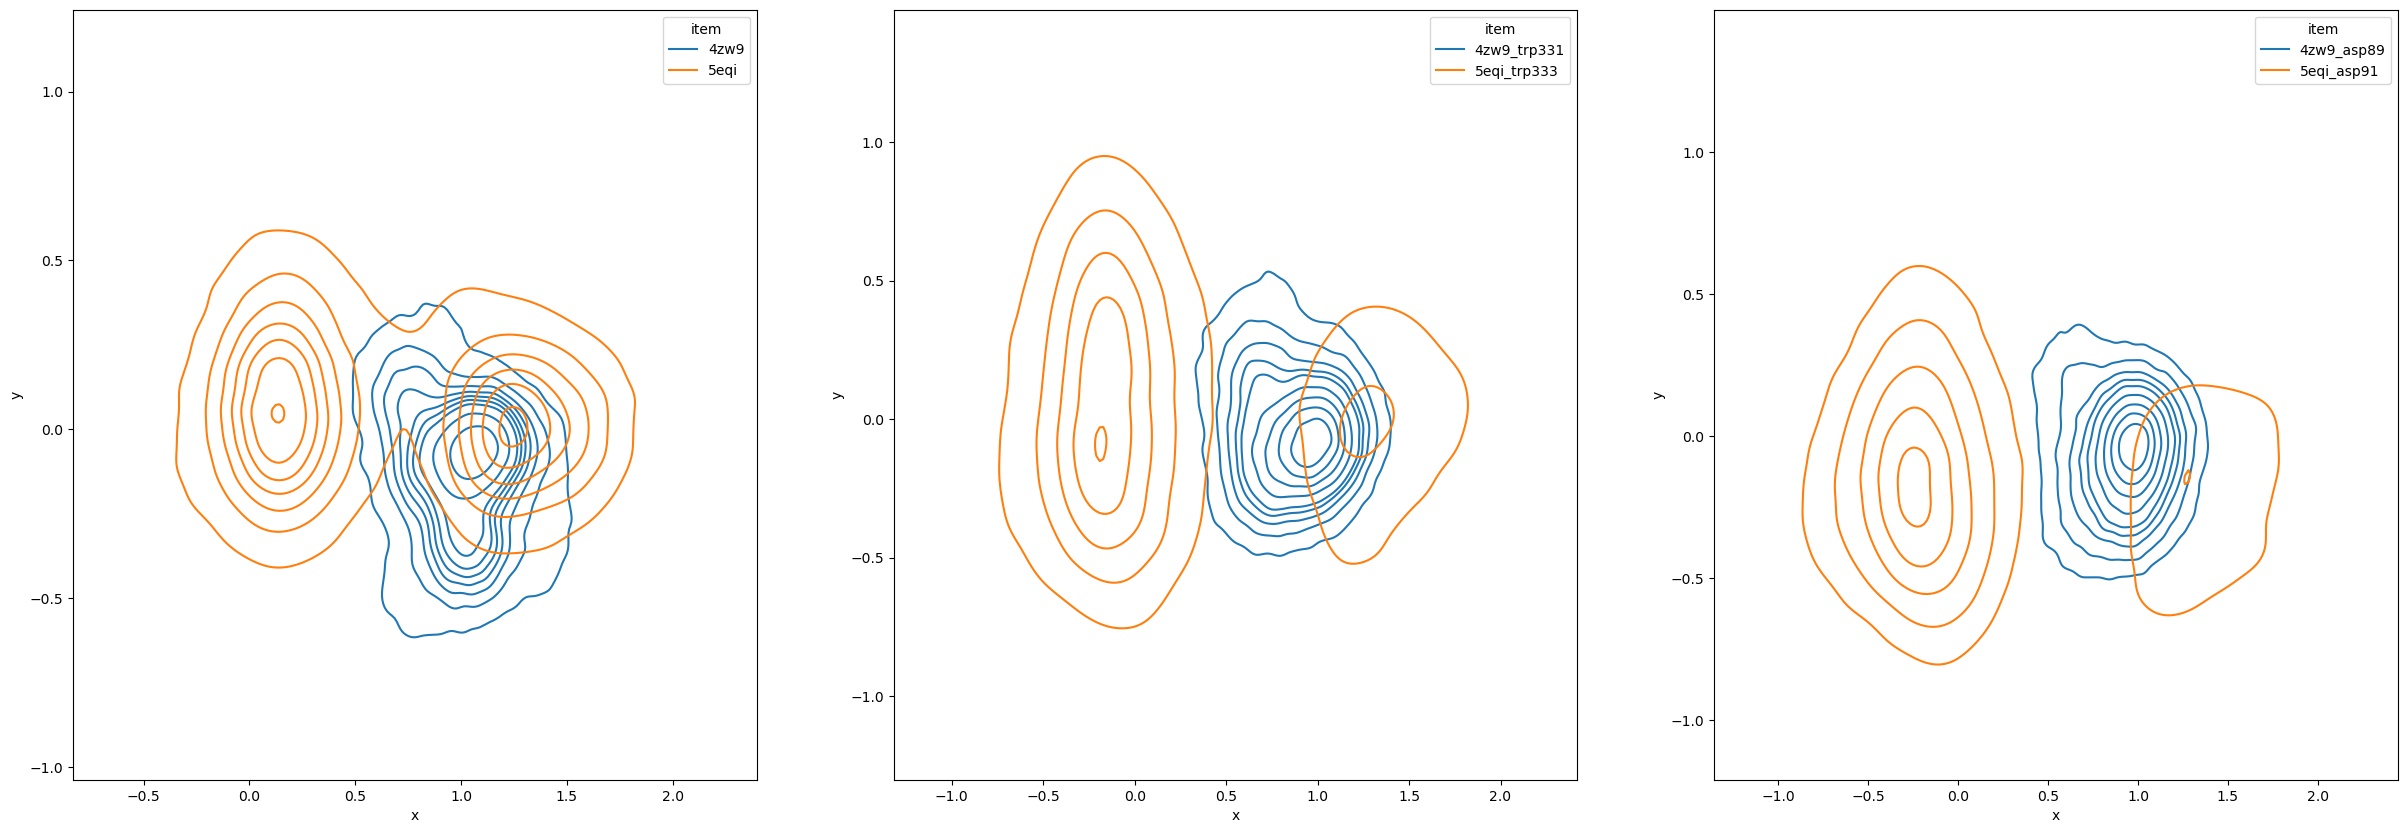

In [6]:
plt.rcParams["figure.figsize"] = (30, 10)
fig, axs = plt.subplots(1, 3)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)

cur = df[(df['item'] == "5eqi") | (df['item'] == "4zw9")]
sns.kdeplot(data=cur, x="x", y="y", hue="item", ax=axs[0])

cur = df[(df['item'] == "5eqi_trp333") | (df['item'] == "4zw9_trp331")]
sns.kdeplot(data=cur, x="x", y="y", hue="item", ax=axs[1])

cur = df[(df['item'] == "5eqi_asp91") | (df['item'] == "4zw9_asp89")]
sns.kdeplot(data=cur, x="x", y="y", hue="item", ax=axs[2])


# axs[0].set_xlim((-13.2, -11.6))
# axs[1].set_xlim((-13.2, -11.6))
# axs[2].set_xlim((-13.2, -11.6))
# axs[0].set_ylim((-6.25, -4))
# axs[1].set_ylim((-6.25, -4))
# axs[2].set_ylim((-6.25, -4))